In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import scipy, scipy.stats
#from sklearn.linear_model import LinearRegression

In [15]:
data=pd.read_csv("C:\\Users\\gverm\\Documents\\Housing.csv")

In [16]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
data.shape

(545, 13)

In [18]:
data.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [19]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [20]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [21]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [22]:
data['furnishingstatus'].unique()
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [23]:
#converting object data into numerical data 
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
data['mainroad']=le.fit_transform(data['mainroad'])
data['guestroom']=le.fit_transform(data['guestroom'])
data['basement']=le.fit_transform(data['basement'])
data['hotwaterheating']=le.fit_transform(data['hotwaterheating'])
data['airconditioning']=le.fit_transform(data['airconditioning'])
data['prefarea']=le.fit_transform(data['prefarea'])
data['furnishingstatus']=le.fit_transform(data['furnishingstatus'])

data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [24]:
# knowing about a dataset which lies above 95% of quantile

max_thresold = data.price.quantile(0.99)
max_thresold


10541999.999999963

In [25]:
# finding datasets which are heigher than threshold value

data[data['price']>max_thresold]  

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1


In [26]:
max_thresold = data.price.quantile(0.99)
max_thresold

10541999.999999963

In [27]:
# finding datasets which are heigher then threshold value

data[data['price']>max_thresold]   

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1


In [28]:
min_thresold = data.price.quantile(0.02)
min_thresold

2100000.0

In [29]:
data[data['price']<min_thresold] 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
536,1960000,3420,5,1,2,0,0,0,0,0,0,0,2
537,1890000,1700,3,1,2,1,0,0,0,0,0,0,2
538,1890000,3649,2,1,1,1,0,0,0,0,0,0,2
539,1855000,2990,2,1,1,0,0,0,0,0,1,0,2
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,2


In [30]:
#Remove outliers

#df1=df[(df['height']<max_thresold) & (df['height']>min_thresold)]
#df1    

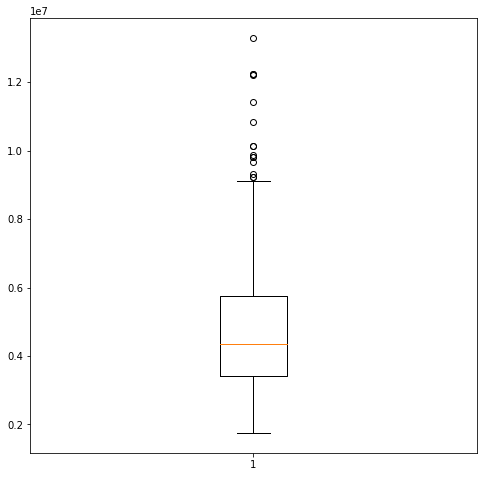

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.boxplot(data['price'])
plt.show();

In [32]:
#Remove outliers

#df1=data[(data['price']<max_thresold) & (data['price']>min_thresold)]
#df1   

In [33]:
#plt.figure(figsize=(8,8))
#plt.boxplot(df1['price'])
#plt.show();

In [34]:
import statsmodels.formula.api as sm
import scipy, scipy.stats

In [35]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

In [53]:
scaled

array([[1.        , 0.39656357, 0.6       , ..., 0.66666667, 1.        ,
        0.        ],
       [0.90909091, 0.5024055 , 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.90909091, 0.57113402, 0.4       , ..., 0.66666667, 1.        ,
        0.5       ],
       ...,
       [0.        , 0.13539519, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.08659794, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.15120275, 0.4       , ..., 0.        , 0.        ,
        1.        ]])

In [59]:
# split data into target and features
X=scaled.drop("price",axis=1)
y=scaled.price

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [57]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [41]:
X.head()
len(X)

545

In [42]:
# split data into traing and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 1 )

In [43]:
len(X_train)

381

In [44]:
len(X_test)

164

In [45]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit( X_train, y_train )#fit model on train data


LinearRegression()

In [46]:
linreg.intercept_

113431.23145117424

In [47]:
from sklearn import metrics

In [48]:
#mean squared Error
#mean squared Error
y_pred = linreg.predict( X_test )
MSE=metrics.mean_squared_error( y_test, y_pred )
print (MSE)

1375329793553.1296


In [49]:
#calculating R2
print (metrics.r2_score(y_test, y_pred ))

0.662117340196921


1172744.56
